# Notebook 1 - Working with Vector Data in GemGIS

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for direct use in [GemPy](https://github.com/cgre-aachen/gempy) via a GemPy Data Class. The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from WMS Services or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, chosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook will present how vector data can be loaded into GemGIS with the [GeoPandas](https://geopandas.org/) package and how it can be manipulated for the usage in [GemPy](https://github.com/cgre-aachen/gempy). This includes the extraction of coordinates and height values from a GeoDataFrame and DEM, respectively. 

- [What is Vector Data?](#vector)
- [What is GeoPandas?](#gpd)
- [What is GemPy?](#gempy)
- [What are Interfaces and Orientations?](#intandor)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)

- [Example 1.1 - Point Data - Interface](#ex1.1)
- [Example 1.2 - Point Data - Orientations](#ex1.2)
- [Example 2.1 - Line Data - Lithological Boundaries](#ex2.1)
- [Example 2.2 - Line Data - Contour Lines](#ex2.2)
- [Example 3.1 - Clip Vector Data by Extent - Points](#ex3.1)
- [Example 3.2 - Clip Vector Data by Extent - Lines](#ex3.2)
- [Example 3.3 - Clip Vector Data by Shape - Points](#ex3.3)
- [Example 3.4 - Clip Vector Data by Shape - Lines](#ex3.4)
- [Creating a GemPy Model with GemPy Data Class](#ex4)
- [Postprocessing - Converting Geological Map to Shape Files and GeoTIFF](#post)

<a id='vector'></a>
## What is vector data?

Vector data provide a way to represent real world features within the GIS environment. A feature is anything you can see on the landscape. Imagine you are standing on the top of a hill. Looking down you can see houses, roads, trees, rivers, and so on. Each one of these things would be a feature when we represent them in a GIS Application. Vector features have attributes, which consist of text or numerical information that describe the features.

**Point Data**<br>
A point feature has an X, Y and optionally, Z value. The X and Y values will depend on the Coordinate Reference System (CRS) being used. For now let us simply say that a CRS is a way to accurately describe where a particular place is on the earth's surface. One of the most common reference systems is Longitude and Latitude. Lines of Longitude run from the North Pole to the South Pole. Lines of Latitude run from the East to West. You can describe precisely where you are at any place on the earth by giving someone your Longitude (X) and Latitude (Y). Since we know the earth is not flat, it is often useful to add a Z value to a point feature. This describes how high above sea level you are.


**Polyline Data**<br>
A polyline is used to show the geometry of linear features such as roads, rivers, contours, footpaths, flight paths and so on. Sometimes we have special rules for polylines in addition to their basic geometry. For example contour lines may touch (e.g. at a cliff face) but should never cross over each other. Similarly, polylines used to store a road network should be connected at intersections. In some GIS applications you can set these special rules for a feature type (e.g. roads) and the GIS will ensure that these polylines always comply to these rules.


**Polygons**<br>
Polygon features are enclosed areas like dams, islands, country boundaries and so on. Like polyline features, polygons are created from a series of vertices that are connected with a continuous line. However, because a polygon always describes an enclosed area, the first and last vertices should always be at the same place! Polygons often have shared geometry –– boundaries that are in common with a neighbouring polygon. Many GIS applications have the capability to ensure that the boundaries of neighbouring polygons exactly coincide. 

<img src="../data/Images/vector.png" width="300">

Sources: https://docs.qgis.org/2.8/en/docs/gentle_gis_introduction/vector_data.html, https://www.vebuso.com/2019/01/vector-raster-tale-two-spatial-data-types/

<a id='gpd'></a>
## What is GeoPandas?

[GeoPandas](https://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by [Pandas](https://pandas.pydata.org/) to allow spatial operations on geometric types. Geometric operations are performed by [shapely](https://shapely.readthedocs.io/en/latest/manual.html). Geopandas further depends on [fiona](https://fiona.readthedocs.io/en/latest/manual.html) for file access and [descartes](https://pypi.org/project/descartes/) and [matplotlib](https://matplotlib.org/) for plotting

For more information see: https://geopandas.org/index.html

<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc

<a id='intandor'></a>
## What are Interfaces and Orientations?
`GemPy`is using an implicit modeling approach based on the potential field method to create geological models. The only input data required are interfaces (layer boundaries in outcrops or in wells) and orientations (dip and azimuth values of a given orientation). The necessary information for interfaces are the `X`,`Y` and `Z`coordinates as well as the `formation`. Please be aware that `GemPy` is always referring to the base of a formation! For orientations, `X`,`Y` and `Z`coordinates, the `formation` and `dip`, `azimuth` and a `polarity` values is needed. The polarity is usually set to 1. 

<img src="../data/Images/orientations.jpg" width="300">

Image Source: https://www.geolstuffmnl.com/post/measuring-strike-and-dip

<a id='gemgis'></a>
## Downloading and installing GemGIS

`GemGIS` is currently under development and only available at https://github.com/cgre-aachen/gemgis. Pip and conda versions including documentation will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load WMS services as arrays/rasters
* `visualization.py` - file containing functions to simplify plotting of spatial data
* `postprocessing.py` - file containing functions to postprocess GemPy geo_model data




If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 

<a id='import'></a>
# Importing Libraries

Apart from creating a GemPyData class in later tutorials, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.6.1 is the latest stable version that is supported by GemGIS***. A general introduction to working with rasters and Rasterio objects in GemGIS is provided in the next notebook.

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
print(gg)

<module 'gemgis' from '../../gemgis\\gemgis\\__init__.py'>


<a id='vreport'></a>
# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Sat Jul 25 21:31:29 2020 W. Europe Daylight Time

                OS : Windows
            CPU(s) : 24
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.18.5
            scooby : 0.5.2
            owslib : 0.17.0
            pandas : 1.0.5
           shapely : 1.6.4.post1
           pyvista : 0.25.3
          rasterio : 1.0.21
         geopandas : 0.6.1
          requests : 2.24.0
             scipy : 1.5.0
        matplotlib : 3.2.2

  Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

<a id='ex1.1'></a>
# Example 1.1 - Point Data - Interfaces

As a first example we will have a look at a geological map as shown below. The gray southward dipping layer is surrounded by two white layers. The topography decreases from north to south. A shape file ```interfaces1.shp``` contains points digitized along the layer boundaries. The respective formation for the base of each layer is provided. This data can now be loaded and plotted as shown below. The strength of GemGIS is that it is working with pure GeoDataFrames providing you with their full range of functionality.

**What is a GeoDataFrame?**<br>
A GeoDataFrame object is a pandas.DataFrame that has a column with geometry. 

For more information see: https://geopandas.org/reference/geopandas.GeoDataFrame.html

**What is a coordinate reference system?**<br>
The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.

For more information see: https://geopandas.org/projections.html and https://spatialreference.org/ for codes for most commonly used projections.

For the tutorials `EPSG:4326`(WGS84 latitude-longitude projection) is used. It ranges from -180 to 180 degrees (longitude) and -90 to 90 degrees (latitude). For simplicity it is assumed that the units are meters and not degrees. This implies that the extent of the examples does not relate to the real world but a CRS is needed for transformation purposes. 

***For this example we will use the following functions:***

- ```gg.utils.set_extent(...)```
- ```gg.vector.extract_xy(...)```
- ```gg.vector.extract_z(...)```
- ```gg.vector.extract_coordinates(...)```

<img src="../data/Test1/task1.png" width="300">



## Loading data

The interface data will be loaded as a GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the [repository](https://github.com/cgre-aachen/gemgis). Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [3]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```.

In [4]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

## Inspecting the GeoDataFrame

GeoPandas GeoDataFrames have different attributes that can easily be accessed. Each GeoDataFrame must contain a ```geometry``` column. Each row of the GeoDataFrame defines one object. In this case, each row defines one point with an X and Y coordinate. 

In [5]:
interfaces.head()

id formation                 geometry
0  None       Ton   POINT (19.150 293.313)
1  None       Ton   POINT (61.934 381.459)
2  None       Ton  POINT (109.358 480.946)
3  None       Ton  POINT (157.812 615.999)
4  None       Ton  POINT (191.318 719.094)

In [6]:
interfaces.dtypes

id             object
formation      object
geometry     geometry
dtype: object

In [7]:
interfaces.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         0 non-null      object  
 1   formation  41 non-null     object  
 2   geometry   41 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.1+ KB


In [8]:
# Coordinate Reference System (CRS)
interfaces.crs

{'init': 'epsg:4326'}

In [9]:
# Geometry type of each object within the GeoDataFrame
interfaces.geom_type.head()

0    Point
1    Point
2    Point
3    Point
4    Point
dtype: object

In [10]:
# Total bounds of the objects
interfaces.total_bounds

array([   8.84067296,  164.9607695 ,  966.07357798, 1045.38823411])

In [11]:
# As we loaded points, the area of each object is equal to 0
interfaces.area.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [12]:
# The bounds of each object within the GeoDataFrame
interfaces.bounds.head()

minx        miny        maxx        maxy
0   19.150128  293.313485   19.150128  293.313485
1   61.934367  381.459326   61.934367  381.459326
2  109.357860  480.945568  109.357860  480.945568
3  157.812299  615.999430  157.812299  615.999430
4  191.318028  719.093981  191.318028  719.093981

In [13]:
interfaces.geometry.x.head()

0     19.150128
1     61.934367
2    109.357860
3    157.812299
4    191.318028
dtype: float64

In [14]:
interfaces.geometry.y.head()

0    293.313485
1    381.459326
2    480.945568
3    615.999430
4    719.093981
dtype: float64

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

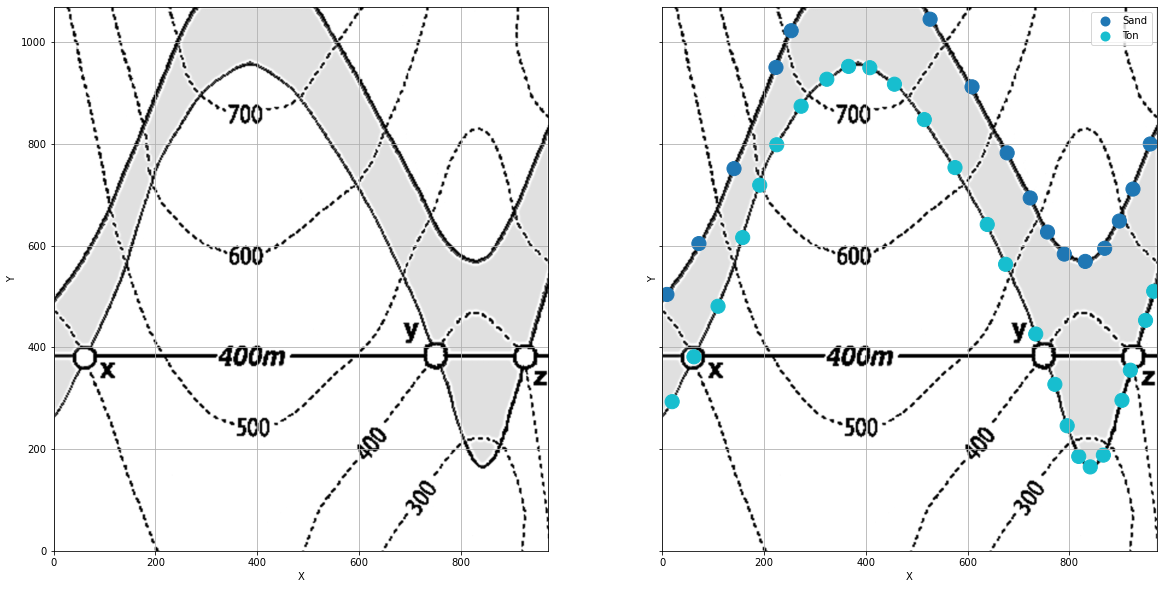

In [15]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the interfaces on the geological map
interfaces.plot(ax=ax2, column = 'formation', legend = True, s = 200)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Extracting X,Y coordinates from GeoDataFrame

The X and Y location of the set points are stored in the geometry column. ```gg.extract_xy_values(...)``` extracts the X and Y coordinates of each point and returns a GeoDataFrame with the appended columns. By setting ```inplace=False``` (default value) a deep copy of the original GeoDataFrame is created and returned.

### Loading data

In [16]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')

### Extracting XY values

In [17]:
interfaces_XY = gg.vector.extract_xy(interfaces, inplace=False)
interfaces_XY.head()

id formation                 geometry           X           Y
0  None       Ton   POINT (19.150 293.313)   19.150128  293.313485
1  None       Ton   POINT (61.934 381.459)   61.934367  381.459326
2  None       Ton  POINT (109.358 480.946)  109.357860  480.945568
3  None       Ton  POINT (157.812 615.999)  157.812299  615.999430
4  None       Ton  POINT (191.318 719.094)  191.318028  719.093981

The X and Y columns are now of dtype float64.

In [18]:
interfaces_XY.dtypes

id             object
formation      object
geometry     geometry
X             float64
Y             float64
dtype: object

The original GeoDataFrame remains unchanged.

In [19]:
interfaces.head()

id formation                 geometry
0  None       Ton   POINT (19.150 293.313)
1  None       Ton   POINT (61.934 381.459)
2  None       Ton  POINT (109.358 480.946)
3  None       Ton  POINT (157.812 615.999)
4  None       Ton  POINT (191.318 719.094)

## Extracting Z values from DEM

A digital elevation model (DEM) is usually needed for constructing geological models. A notebook specifically provided for rasters is provided with the repository. The function ```gg.vector.extract_z(...)``` can be used to extract height values directly from the DEM. 

### Loading DEM

The DEM is loaded as a rasterio object first. An introduction to rasterio objects and working with rasters in GemGIS is probvided in the next notebook.

In [20]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')

### Extracting Z values

If X and Y coordinates are not present within the interfaces GeoDataFrame, X, Y and Z values will be appended as columns to the GeoDataFrame.

In [21]:
interfaces_Z = gg.vector.extract_z(interfaces, dem, inplace=False)
interfaces_Z.head()

id formation                 geometry           X           Y           Z
0  None       Ton   POINT (19.150 293.313)   19.150128  293.313485  364.994873
1  None       Ton   POINT (61.934 381.459)   61.934367  381.459326  400.343597
2  None       Ton  POINT (109.358 480.946)  109.357860  480.945568  459.549316
3  None       Ton  POINT (157.812 615.999)  157.812299  615.999430  525.691040
4  None       Ton  POINT (191.318 719.094)  191.318028  719.093981  597.632507

The original GeoDataFrame remains unchanged.

In [22]:
interfaces.head()

id formation                 geometry
0  None       Ton   POINT (19.150 293.313)
1  None       Ton   POINT (61.934 381.459)
2  None       Ton  POINT (109.358 480.946)
3  None       Ton  POINT (157.812 615.999)
4  None       Ton  POINT (191.318 719.094)

## Extracting XY coordinates from GeoDataFrame and Z values from DEM

Both coordinates and heights can also be extracted directly the GeoDataFrame and the DEM with ```gg.extract_coordinates(...)```.

### Loading Data

In [23]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')

### Extracting XYZ values

In [24]:
interfaces_XYZ = gg.vector.extract_coordinates(interfaces, dem)
interfaces_XYZ.head()

id formation                 geometry           X           Y           Z
0  None       Ton   POINT (19.150 293.313)   19.150128  293.313485  364.994873
1  None       Ton   POINT (61.934 381.459)   61.934367  381.459326  400.343597
2  None       Ton  POINT (109.358 480.946)  109.357860  480.945568  459.549316
3  None       Ton  POINT (157.812 615.999)  157.812299  615.999430  525.691040
4  None       Ton  POINT (191.318 719.094)  191.318028  719.093981  597.632507

The original GeoDataFrame remains unchanged.

In [25]:
interfaces.head()

id formation                 geometry
0  None       Ton   POINT (19.150 293.313)
1  None       Ton   POINT (61.934 381.459)
2  None       Ton  POINT (109.358 480.946)
3  None       Ton  POINT (157.812 615.999)
4  None       Ton  POINT (191.318 719.094)

<a id='ex1.2'></a>
# Example 1.2 - Point Data - Orientations

As a second example we will have a look at the same geological map as before. A shape file ```orientations1.shp``` contains orientation values belonging to the gray layer. This data can now be loaded and plotted as shown below. Orientation values require a dip and an azimuth.  

For this example we will use the following functions:

- ```gg.utils.set_extent(...)```
- ```gg.vector.extract_xy(...)```
- ```gg.vector.extract_z(...)```
- ```gg.vector.extract_coordinates(...)```

<img src="../data/Test1/task1.png" width="300">

## Loading data

The orientation data will be loaded as GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the repository. Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [26]:
orientations = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```.

In [27]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

## Inspecting the GeoDataFrame

GeoPandas GeoDataFrames have different attributes that can easily be accessed. Each GeoDataFrame must contain a ```geometry``` column. Each row of the GeoDataFrame is defining one object. In this case, each row defines one point with an X and Y coordinate. 

In [28]:
orientations.head()

id formation   dip  azimuth                 geometry
0  None       Ton  22.5    180.0   POINT (96.471 451.564)
1  None       Ton  22.5    180.0  POINT (172.761 661.877)
2  None       Ton  22.5    180.0  POINT (383.074 957.758)
3  None       Ton  22.5    180.0  POINT (592.356 722.702)
4  None       Ton  22.5    180.0  POINT (766.586 348.469)

The dip and azimuth columns were provided as dtype float64. In case that the dip and azimuth values were not provided as this dtype but as string, the columns are converted by GemGIS automatically. 

In [29]:
orientations.dtypes

id             object
formation      object
dip           float64
azimuth       float64
geometry     geometry
dtype: object

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

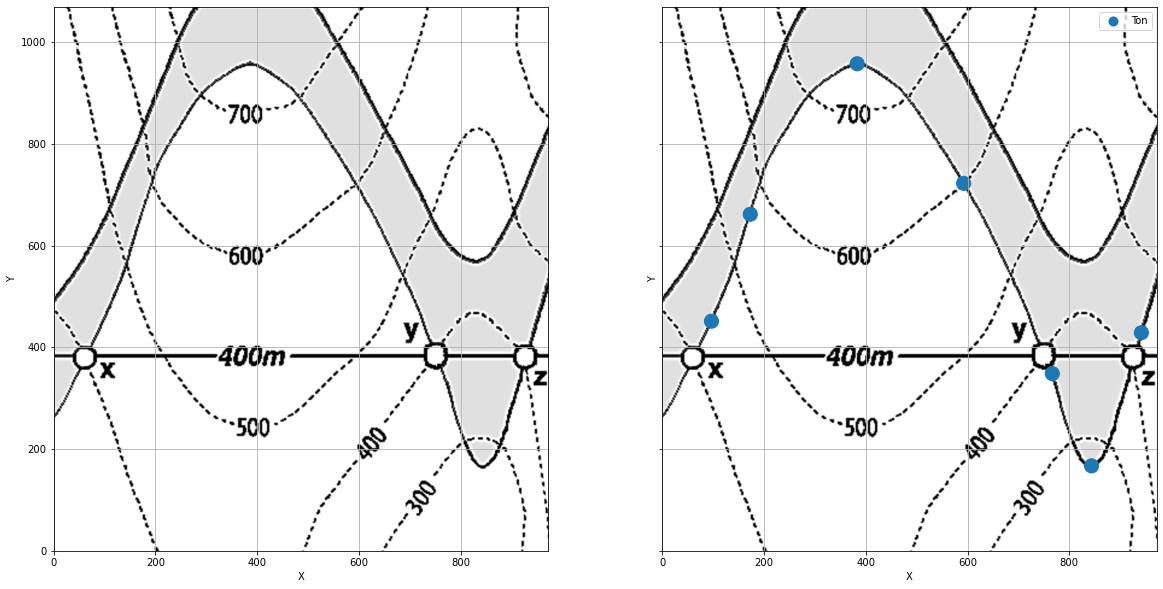

In [30]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the interfaces on the geological map
orientations.plot(ax=ax2, column = 'formation', legend = True, s = 200)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Extracting coordinates from GeoDataFrame

The same functions as introduced before can be used to create new GeoDataFrames with appended X, Y and Z columns

In [31]:
orientations = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

In [32]:
orientations.head()

id formation   dip  azimuth                 geometry
0  None       Ton  22.5    180.0   POINT (96.471 451.564)
1  None       Ton  22.5    180.0  POINT (172.761 661.877)
2  None       Ton  22.5    180.0  POINT (383.074 957.758)
3  None       Ton  22.5    180.0  POINT (592.356 722.702)
4  None       Ton  22.5    180.0  POINT (766.586 348.469)

In [33]:
orientations_XY = gg.vector.extract_xy(orientations, inplace=False)
orientations_XY.head()

id formation   dip  azimuth                 geometry           X  \
0  None       Ton  22.5    180.0   POINT (96.471 451.564)   96.471041   
1  None       Ton  22.5    180.0  POINT (172.761 661.877)  172.761009   
2  None       Ton  22.5    180.0  POINT (383.074 957.758)  383.073893   
3  None       Ton  22.5    180.0  POINT (592.356 722.702)  592.355831   
4  None       Ton  22.5    180.0  POINT (766.586 348.469)  766.585622   

            Y  
0  451.563621  
1  661.876505  
2  957.757866  
3  722.702290  
4  348.469070

In [34]:
orientations_Z = gg.vector.extract_z(orientations, dem, inplace=False)
orientations_Z.head()

id formation   dip  azimuth                 geometry           X  \
0  None       Ton  22.5    180.0   POINT (96.471 451.564)   96.471041   
1  None       Ton  22.5    180.0  POINT (172.761 661.877)  172.761009   
2  None       Ton  22.5    180.0  POINT (383.074 957.758)  383.073893   
3  None       Ton  22.5    180.0  POINT (592.356 722.702)  592.355831   
4  None       Ton  22.5    180.0  POINT (766.586 348.469)  766.585622   

            Y           Z  
0  451.563621  440.590851  
1  661.876505  556.377380  
2  957.757866  729.017761  
3  722.702290  601.553284  
4  348.469070  378.629395

In [35]:
orientations_XYZ = gg.vector.extract_coordinates(orientations, dem, inplace=False)
orientations_XYZ.head()

id formation   dip  azimuth                 geometry           X  \
0  None       Ton  22.5    180.0   POINT (96.471 451.564)   96.471041   
1  None       Ton  22.5    180.0  POINT (172.761 661.877)  172.761009   
2  None       Ton  22.5    180.0  POINT (383.074 957.758)  383.073893   
3  None       Ton  22.5    180.0  POINT (592.356 722.702)  592.355831   
4  None       Ton  22.5    180.0  POINT (766.586 348.469)  766.585622   

            Y           Z  
0  451.563621  440.590851  
1  661.876505  556.377380  
2  957.757866  729.017761  
3  722.702290  601.553284  
4  348.469070  378.629395

The original GeoDataFrame remains unchanged. 

In [36]:
orientations.head()

id formation   dip  azimuth                 geometry
0  None       Ton  22.5    180.0   POINT (96.471 451.564)
1  None       Ton  22.5    180.0  POINT (172.761 661.877)
2  None       Ton  22.5    180.0  POINT (383.074 957.758)
3  None       Ton  22.5    180.0  POINT (592.356 722.702)
4  None       Ton  22.5    180.0  POINT (766.586 348.469)

<a id='ex2.1'></a>
# Example 2.1 - Line Data - Lithological Boundaries
As a third example we will have a look at the same geological map as before. A shape file ```interfaces1_lines.shp``` contains the digitized lithological boundaries in form of lines. The respective formation for the base of each layer is provided. This data can now be loaded and plotted as shown below. 
For this example we will use the following functions:

- ```gg.utils.set_extent(...)```
- ```gg.vector.extract_xy(...)```
- ```gg.vector.extract_z(...)```
- ```gg.vector.extract_coordinates(...)```

<img src="../data/Test1/task1.png" width="300">

## Loading data

The interface data will be loaded as GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the repository. Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [37]:
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```.

In [38]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

## Inspecting the GeoDataFrame

GeoPandas GeoDataFrames have different attributes that can easily be accessed. Each GeoDataFrame must contain a ```geometry``` column. Each row of the GeoDataFrame is defining one object. In this case, each row defines one line which consists of multiple pairs of X and Y coordinates. 

In [39]:
boundaries.head()

id formation                                           geometry
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....
1  None       Ton  LINESTRING (0.188 495.787, 8.841 504.142, 41.0...
2  None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

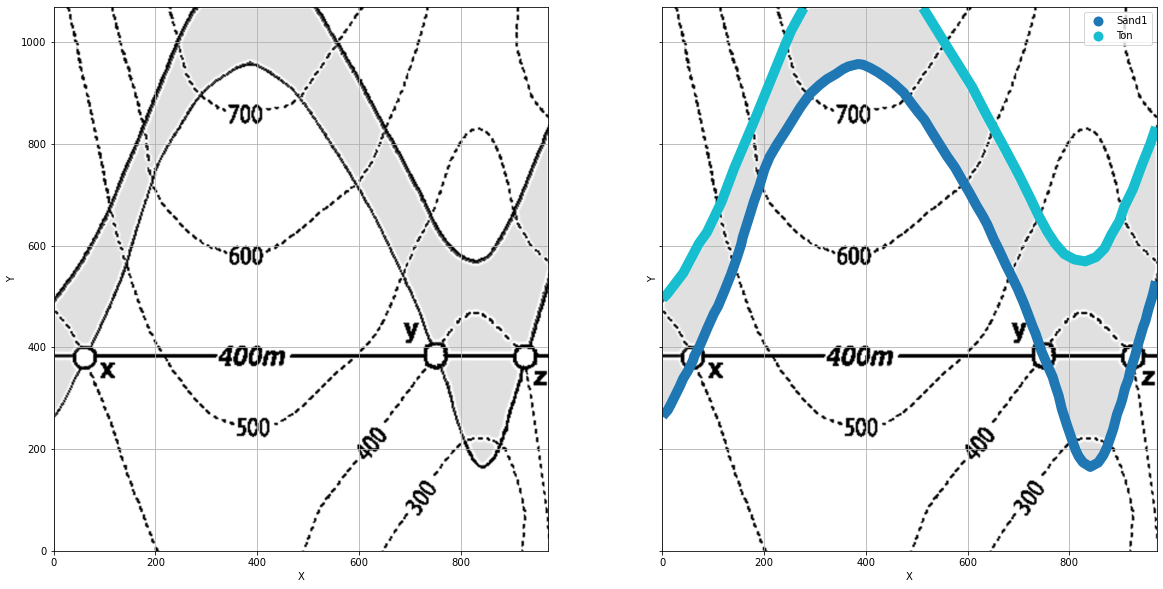

In [40]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the lithological boundaries on the geological map
boundaries.plot(ax=ax2, column = 'formation', legend = True, linewidth = 10)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Extracting coordinates from GeoDataFrame

The same functions as introduced before can be used to create new GeoDataFrames with appended X, Y and Z columns

In [41]:
boundaries = gpd.read_file('../../gemgis/data/Test1/interfaces1_lines.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

In [42]:
boundaries.head()

id formation                                           geometry
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....
1  None       Ton  LINESTRING (0.188 495.787, 8.841 504.142, 41.0...
2  None       Ton  LINESTRING (970.677 833.053, 959.372 800.023, ...

In [43]:
boundaries_XY = gg.vector.extract_xy(boundaries, inplace=False)
boundaries_XY.head()

id formation                                           geometry  \
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   

                                    points          X           Y  
0  (0.256327195431048, 264.86214748436396)   0.256327  264.862147  
0  (10.59346813871597, 276.73370778641777)  10.593468  276.733708  
0   (17.134940141888464, 289.089821570188)  17.134940  289.089822  
0   (19.150128045807676, 293.313485355882)  19.150128  293.313485  
0    (27.79511673965105, 310.571692592952)  27.795117  310.571693

In [44]:
boundaries_Z = gg.vector.extract_z(boundaries, dem, inplace=False)
boundaries_Z.head()

id formation                                           geometry  \
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   

                                    points          X           Y           Z  
0  (0.256327195431048, 264.86214748436396)   0.256327  264.862147  353.972778  
0  (10.59346813871597, 276.73370778641777)  10.593468  276.733708  359.036316  
0   (17.134940141888464, 289.089821570188)  17.134940  289.089822  364.284973  
0   (19.150128045807676, 293.313485355882)  19.150128  293.313485  364.994873  
0    (27.79511673965105, 310.571692592952)  27.795117  310.571693  372.810364

In [45]:
boundaries_XYZ = gg.vector.extract_coordinates(boundaries, dem, inplace=False)
boundaries_XYZ.head()

id formation                                           geometry  \
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   
0  None     Sand1  LINESTRING (0.256 264.862, 10.593 276.734, 17....   

                                    points          X           Y           Z  
0  (0.256327195431048, 264.86214748436396)   0.256327  264.862147  353.972778  
0  (10.59346813871597, 276.73370778641777)  10.593468  276.733708  359.036316  
0   (17.134940141888464, 289.089821570188)  17.134940  289.089822  364.284973  
0   (19.150128045807676, 293.313485355882)  19.150128  293.313485  364.994873  
0    (27.79511673965105, 310.571692592952)  27.795117  310.571693  372.810364

<a id='ex2.2'></a>
# Example 2.2 - Line Data - Topographic Contours
As a fourth example we will have a look at the same geological map as before. A shape file ```topo.shp``` contains the digitized topographic contours in form of lines. The respective height for each line is provided. This data can now be loaded and plotted as shown below. 
For this example we will use the following functions:

- ```gg.utils.set_extent(...)```
- ```gg.vector.extract_xy(...)```
- ```gg.vector.extract_z(...)```
- ```gg.vector.extract_coordinates(...)```

<img src="../data/Test1/task1.png" width="300">

## Loading data

The height data will be loaded as GeoPandas GeoDataFrame. The geological map will be loaded as a rasterio object. The data is provided in the repository. Both types of data store the coordinate reference system (CRS) which is essential to know when transforming data from one CRS to another. 

In [46]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```.

In [47]:
extent = gg.vector.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

## Inspecting the GeoDataFrame

GeoPandas GeoDataFrames have different attributes that can easily be accessed. Each GeoDataFrame must contain a ```geometry``` column. Each row of the GeoDataFrame is defining one object. In this case, each row defines one line which consists of multiple pairs of X and Y coordinates. 

In [48]:
topo.head()

id    Z                                           geometry
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....
1  None  300  LINESTRING (645.965 0.525, 685.141 61.866, 724...
2  None  400  LINESTRING (490.292 0.525, 505.756 40.732, 519...
3  None  600  LINESTRING (911.433 1068.585, 908.856 1026.831...
4  None  700  LINESTRING (228.432 1068.585, 239.772 1017.037...

## Plotting Data

The data within the GeoDataFrame can now be plotted on the geological map without any manipulation by using ```plt.imshow(...)``` and the integrated plotting function of GeoPandas.

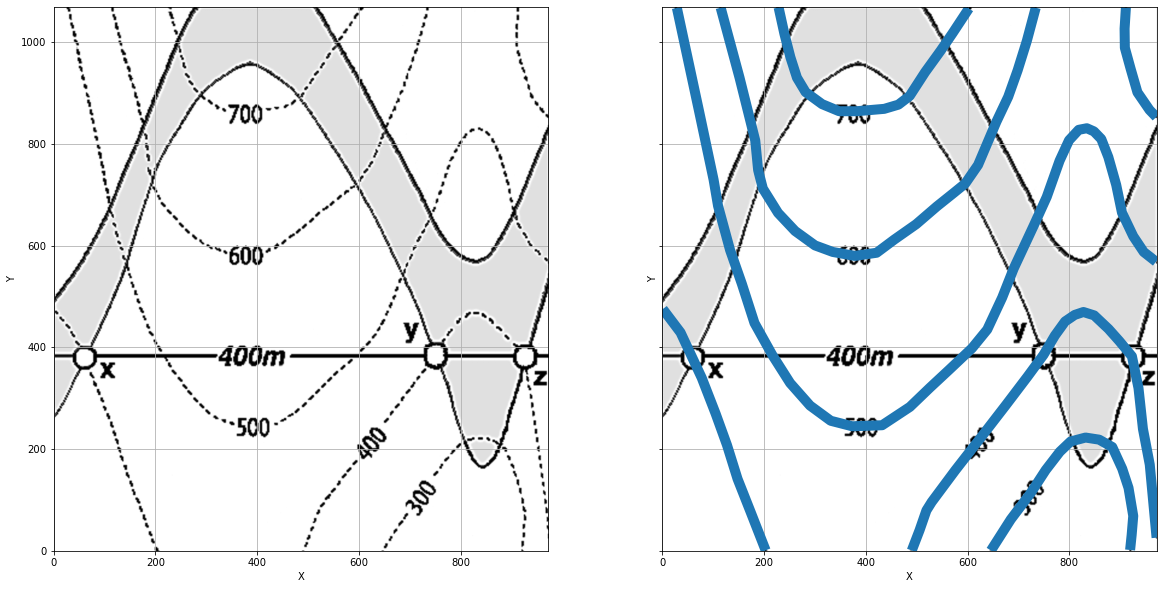

In [49]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the lithological boundaries on the geological map
topo.plot(ax=ax2, legend = False, linewidth = 10)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Extracting coordinates from GeoDataFrame

The same functions as introduced before can be used to create new GeoDataFrames with appended X, Y and Z columns

In [50]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

In [51]:
topo.head()

id    Z                                           geometry
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....
1  None  300  LINESTRING (645.965 0.525, 685.141 61.866, 724...
2  None  400  LINESTRING (490.292 0.525, 505.756 40.732, 519...
3  None  600  LINESTRING (911.433 1068.585, 908.856 1026.831...
4  None  700  LINESTRING (228.432 1068.585, 239.772 1017.037...

In [52]:
topo_XY = gg.vector.extract_xy(topo, inplace=False)
topo_XY.head()

id    Z                                           geometry  \
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   

                                     points           X           Y  
0  (0.7408806771479846, 475.44101474698454)    0.740881  475.441015  
0    (35.62873136073459, 429.2469161566801)   35.628731  429.246916  
0    (77.30033078835194, 340.0890755208477)   77.300331  340.089076  
0  (104.75836141895252, 269.34426719024157)  104.758361  269.344267  
0  (127.04782157791061, 207.64445718500974)  127.047822  207.644457

If Z values are already present a GeoDataFrame column, a DEM is not needed to extract the remaining coordinates.

In [53]:
topo_XYZ = gg.vector.extract_coordinates(topo, inplace=False)
topo_XYZ.head()

id    Z                                           geometry  \
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....   

                                     points           X           Y  
0  (0.7408806771479846, 475.44101474698454)    0.740881  475.441015  
0    (35.62873136073459, 429.2469161566801)   35.628731  429.246916  
0    (77.30033078835194, 340.0890755208477)   77.300331  340.089076  
0  (104.75836141895252, 269.34426719024157)  104.758361  269.344267  
0  (127.04782157791061, 207.64445718500974)  127.047822  207.644457

 <a id='ex3.1'></a>
# Example 3.1 -  Clip Vector Data by Extent - Points
Vector data downloaded from the Internet or created manually based on field data or information obtained from literature may be present in areas beyond the extent of the desired model. For this case, unwanted data can be clipped by defining an extent or bounding box (bbox). Only data points within this bounding box are kept. The function `gg.vector.clip_by_extent(...)` can be used to to clip vector data to a provided extent. For this example, the file `randompoints1.shp`is loaded.

## Loading Data
In order to demonstrate this function, random points were picked inside and outside the geological map. They will then be clipped by the extent of the geological map and the remaining points are shown. 

In [54]:
random_points = gpd.read_file('../../gemgis/data/Test1/randompoints1.shp')
geolmap = rasterio.open('../data/Test1/task1.tif')

## Setting the extent
The extent will be set by the dimensions of the image

In [55]:
extent = gg.utils.set_extent(0, geolmap.read(1).shape[1], 0, geolmap.read(1).shape[0])
extent

[0, 972, 0, 1069]

## Inspecting the Data

In [56]:
random_points.head()

id                 geometry
0  None  POINT (281.526 902.087)
1  None  POINT (925.867 618.577)
2  None  POINT (718.131 342.799)
3  None  POINT (331.011 255.684)
4  None  POINT (300.083 600.535)

In [57]:
len(random_points)

50

## Clipping the Data
By clipping the data, half of the points will be removed. In addition, X and Y coordinates are appended to the column

In [58]:
random_points_clipped = gg.vector.clip_by_extent(random_points, extent, inplace=False)
print(len(random_points_clipped))
random_points_clipped.head()

25


id                 geometry           X           Y
0  None  POINT (281.526 902.087)  281.525760  902.086808
1  None  POINT (925.867 618.577)  925.866703  618.576793
2  None  POINT (718.131 342.799)  718.131183  342.798870
3  None  POINT (331.011 255.684)  331.011144  255.683974
4  None  POINT (300.083 600.535)  300.082779  600.535247

The original gdf remains unchanged

In [59]:
random_points
print(len(random_points))

50


## Plotting the result

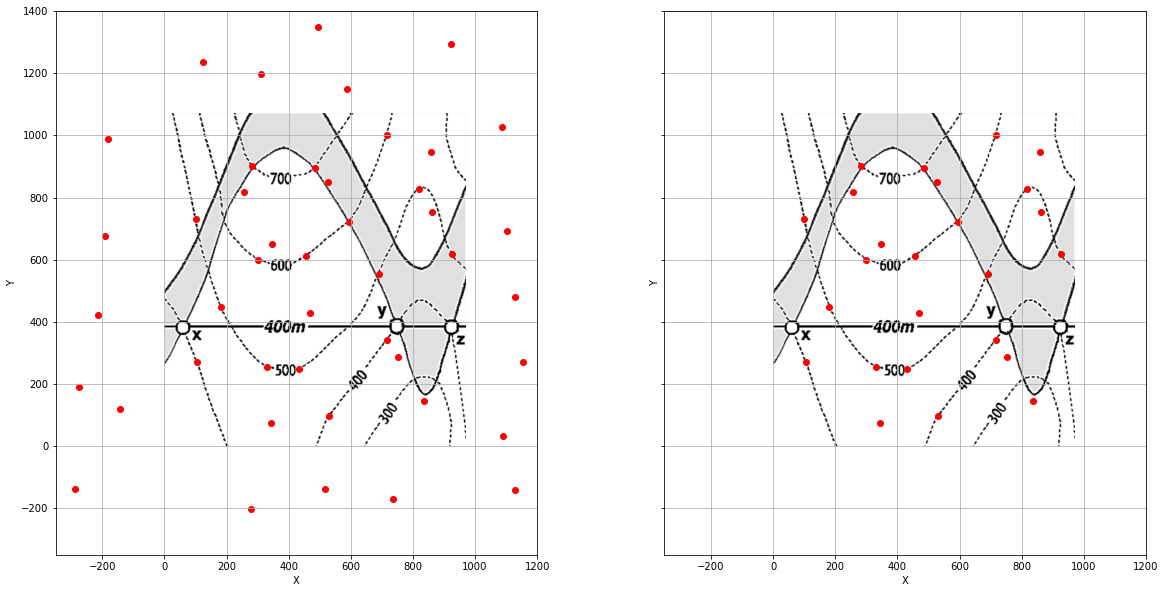

In [60]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
random_points.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
random_points_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

<a id='ex3.2'></a>
# Example 3.2 - Clip Vector Data by Shape - Lines
In the same way as before, lines can be clipped to a desired extent. As a line consists of at least two vertices, the vertices beyond the extent will be removed. 

In [61]:
geolmap = rasterio.open('../data/Test1/task1.tif')
random_lines = gpd.read_file('../../gemgis/data/Test1/randomlines1.shp')
random_lines.head()

id                                           geometry
0  None  LINESTRING (114.913 978.626, 860.498 160.727, ...
1  None      LINESTRING (214.657 108.361, 743.299 868.907)
2  None      LINESTRING (107.433 522.298, 892.915 542.247)
3  None     LINESTRING (813.120 1003.562, 212.163 641.990)
4  None  LINESTRING (-299.023 1247.934, 192.215 587.131...

## Setting the Extent

In [62]:
extent = gg.utils.set_extent(0, geolmap.read(1).shape[1], 0, geolmap.read(1).shape[0])
extent

[0, 972, 0, 1069]

## Inspecting the Data

In [63]:
random_lines.head()

id                                           geometry
0  None  LINESTRING (114.913 978.626, 860.498 160.727, ...
1  None      LINESTRING (214.657 108.361, 743.299 868.907)
2  None      LINESTRING (107.433 522.298, 892.915 542.247)
3  None     LINESTRING (813.120 1003.562, 212.163 641.990)
4  None  LINESTRING (-299.023 1247.934, 192.215 587.131...

In [64]:
len(random_lines)

7

## Clipping the Lines

In [65]:
random_lines_clipped = gg.vector.clip_by_extent(random_lines, extent, inplace=False)
print(len(random_lines_clipped))
random_lines_clipped.head()

12


id                                           geometry  \
0  None  LINESTRING (114.913 978.626, 860.498 160.727, ...   
0  None  LINESTRING (114.913 978.626, 860.498 160.727, ...   
0  None  LINESTRING (114.913 978.626, 860.498 160.727, ...   
1  None      LINESTRING (214.657 108.361, 743.299 868.907)   
1  None      LINESTRING (214.657 108.361, 743.299 868.907)   

                                     points           X           Y  
0   (114.91329461659507, 978.6256160638271)  114.913295  978.625616  
0     (860.498073884288, 160.7265939909064)  860.498074  160.726594  
0     (860.498073884288, 160.7265939909064)  860.498074  160.726594  
1  (214.65707779621948, 108.36110782160335)  214.657078  108.361108  
1    (743.2991286482293, 868.9074545662402)  743.299129  868.907455

## Plotting the Result

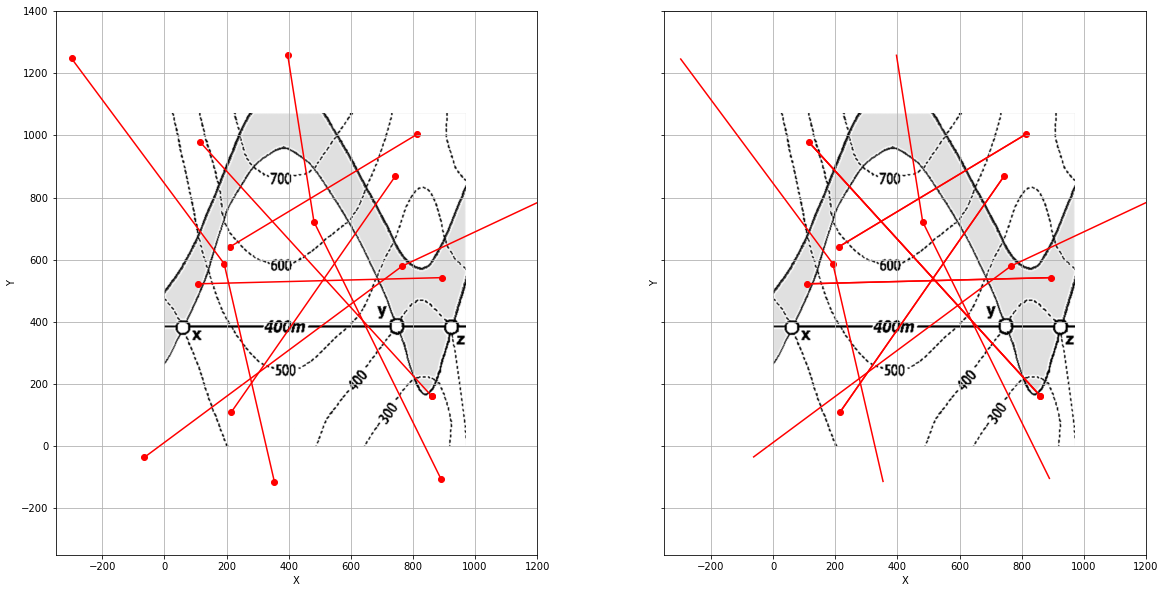

In [66]:
random_lines_points = gg.vector.extract_xy(random_lines)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
ax1.scatter(random_lines_points.X, random_lines_points.Y, color='red')
random_lines.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
ax2.scatter(random_lines_clipped.X, random_lines_clipped.Y, color='red')
random_lines_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

<a id='ex3.3'></a>
# Example 3.3 - Clip Vector Data by Shape - Points

Besides clipping Vector data by providing an extent, it can also be clipped using a shape (file). Once again, the size of the shape is equal to the boundaries of the geological map.

## Loading data

In [67]:
random_points = gpd.read_file('../../gemgis/data/Test1/randompoints1.shp')
geolmap = rasterio.open('../data/Test1/task1.tif')
extent = gpd.read_file('../../gemgis/data/Test1/extent1.shp')

## Inspecting the Data

In [68]:
random_points.head()

id                 geometry
0  None  POINT (281.526 902.087)
1  None  POINT (925.867 618.577)
2  None  POINT (718.131 342.799)
3  None  POINT (331.011 255.684)
4  None  POINT (300.083 600.535)

In [69]:
len(random_points)

50

## Clipping the Data

In [70]:
random_points_clipped = gg.vector.clip_by_shape(random_points, extent)
random_points_clipped.head()

id                 geometry           X           Y
0  None  POINT (281.526 902.087)  281.525760  902.086808
1  None  POINT (925.867 618.577)  925.866703  618.576793
2  None  POINT (718.131 342.799)  718.131183  342.798870
3  None  POINT (331.011 255.684)  331.011144  255.683974
4  None  POINT (300.083 600.535)  300.082779  600.535247

## Plotting the Result

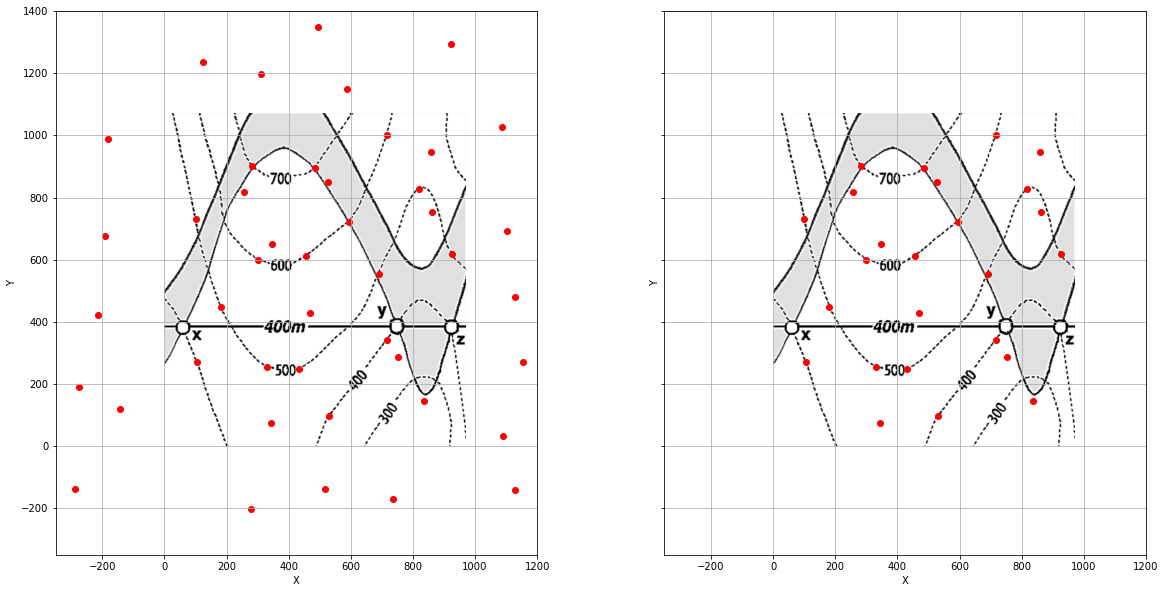

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
random_points.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
random_points_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

<a id='ex3.4'></a>
# Example 3.4 - Clipping Vector Data by Shape - Lines
In the same way as before, lines can be clipped by a provided shape. As a line consists of at least two vertices, the vertices beyond the extent will be removed. 

## Loading Data

In [72]:
random_lines = gpd.read_file('../../gemgis/data/Test1/randomlines1.shp')
geolmap = rasterio.open('../data/Test1/task1.tif')
extent = gpd.read_file('../../gemgis/data/Test1/extent1.shp')

## Inspecting the Data

In [73]:
random_lines.head()

id                                           geometry
0  None  LINESTRING (114.913 978.626, 860.498 160.727, ...
1  None      LINESTRING (214.657 108.361, 743.299 868.907)
2  None      LINESTRING (107.433 522.298, 892.915 542.247)
3  None     LINESTRING (813.120 1003.562, 212.163 641.990)
4  None  LINESTRING (-299.023 1247.934, 192.215 587.131...

In [74]:
len(random_lines)

7

## Clipping the Data

In [75]:
random_lines_clipped = gg.vector.clip_by_shape(random_lines, extent)
random_lines_clipped.head()

id                                           geometry  \
0  None  LINESTRING (114.913 978.626, 860.498 160.727, ...   
0  None  LINESTRING (114.913 978.626, 860.498 160.727, ...   
0  None  LINESTRING (114.913 978.626, 860.498 160.727, ...   
1  None      LINESTRING (214.657 108.361, 743.299 868.907)   
1  None      LINESTRING (214.657 108.361, 743.299 868.907)   

                                     points           X           Y  
0   (114.91329461659507, 978.6256160638271)  114.913295  978.625616  
0     (860.498073884288, 160.7265939909064)  860.498074  160.726594  
0     (860.498073884288, 160.7265939909064)  860.498074  160.726594  
1  (214.65707779621948, 108.36110782160335)  214.657078  108.361108  
1    (743.2991286482293, 868.9074545662402)  743.299129  868.907455

## Plotting the Result

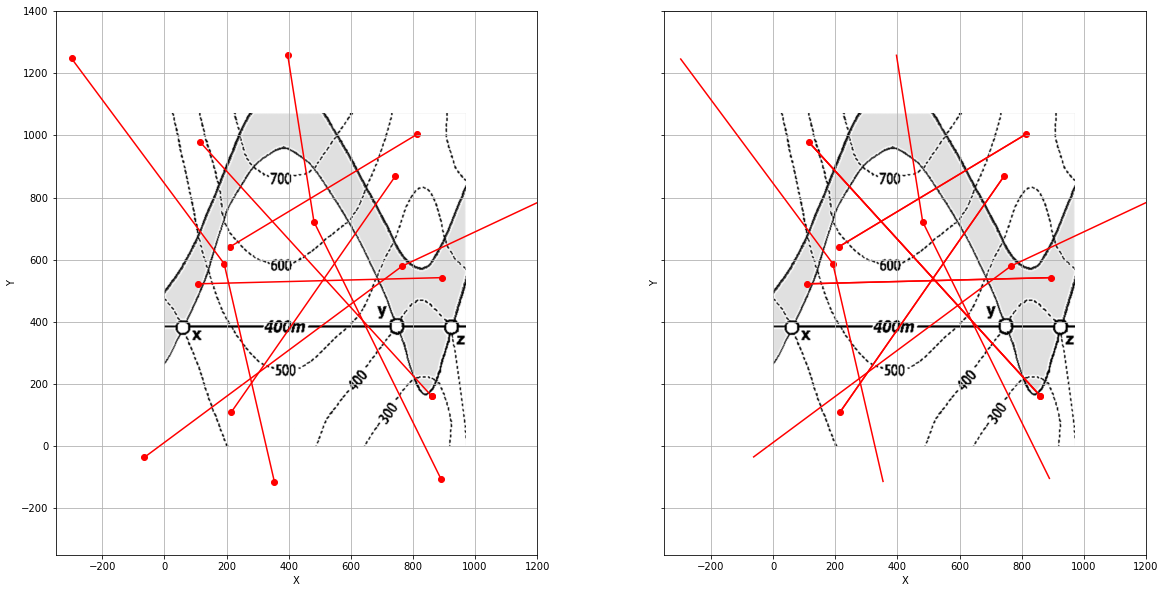

In [76]:
random_lines_points = gg.vector.extract_xy(random_lines)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
ax1.scatter(random_lines_points.X, random_lines_points.Y, color='red')
random_lines.plot(ax=ax1, color='red')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
ax2.scatter(random_lines_clipped.X, random_lines_clipped.Y, color='red')
random_lines_clipped.plot(ax=ax2, color='red')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

<a id='ex4'></a>
# Creating a simple GemPy Model - GemPy Data Class

As GemGIS is providing functions to more easily create GemPy Models, a **GemPy Data Class** is being introduced. This class consists of attributes, such as the CRS of all input data, the interfaces, orientations, custom_sections, etc. It can be initiated empty or attributes can be passed during the initiation. During the course of the following notebooks, more and more attributes will be introduced. For more information about GemPy, visit https://docs.gempy.org/ or https://github.com/cgre-aachen/gempy.

## Initiating the class without attributes

In [77]:
geo_data = gg.GemPyData()

The following attributes are currently available:

In [78]:
vars(geo_data)

{'model_name': None,
 'crs': None,
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'faults': None,
 'is_fault': None}

## Initiating the class with attributes

In [79]:
geo_data = gg.GemPyData(model_name='Model1', 
                        crs='EPSG:4326', 
                        extent=[0., 972., 0., 1069., 300., 800.], 
                        resolution=[50,50,50],
                        stack={"Strat_Series": ('Sand', 'Ton')},
                        dem='../../gemgis/data/Test1/raster1.tif',
                        surface_colors= {'Ton':'#015482',
                                         'Sand':'#9f0052',
                                         'basement':'#ffbe00'})

In [80]:
vars(geo_data)

{'model_name': 'Model1',
 'crs': 'EPSG:4326',
 'extent': [0.0, 972.0, 0.0, 1069.0, 300.0, 800.0],
 'resolution': [50, 50, 50],
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': {'Strat_Series': ('Sand', 'Ton')},
 'dem': '../../gemgis/data/Test1/raster1.tif',
 'surface_colors': {'Ton': '#015482',
  'Sand': '#9f0052',
  'basement': '#ffbe00'},
 'geolmap': None,
 'faults': None,
 'is_fault': None}

## Inspecting GemPy Data Class

In [81]:
geo_data.model_name

'Model1'

In [82]:
geo_data.crs

'EPSG:4326'

In [83]:
geo_data.extent

[0.0, 972.0, 0.0, 1069.0, 300.0, 800.0]

In [84]:
geo_data.resolution

[50, 50, 50]

In [85]:
geo_data.stack

{'Strat_Series': ('Sand', 'Ton')}

In [86]:
geo_data.dem

'../../gemgis/data/Test1/raster1.tif'

In [87]:
geo_data.surface_colors

{'Ton': '#015482', 'Sand': '#9f0052', 'basement': '#ffbe00'}

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [88]:
import sys  
sys.path.append('../../gempy-master')
import gempy as gp
from matplotlib.colors import ListedColormap
print(gp)
print(gp.__version__)

<module 'gempy' from '../../gempy-master\\gempy\\__init__.py'>
2.2.2


## Loading interfaces and orientations for model

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [89]:
interfaces = gpd.read_file('../../gemgis/data/Test1/interfaces1.shp')
orientations = gpd.read_file('../../gemgis/data/Test1/orientations1.shp')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

In [90]:
interfaces.head()

id formation                 geometry
0  None       Ton   POINT (19.150 293.313)
1  None       Ton   POINT (61.934 381.459)
2  None       Ton  POINT (109.358 480.946)
3  None       Ton  POINT (157.812 615.999)
4  None       Ton  POINT (191.318 719.094)

In [91]:
orientations.head()

id formation   dip  azimuth                 geometry
0  None       Ton  22.5    180.0   POINT (96.471 451.564)
1  None       Ton  22.5    180.0  POINT (172.761 661.877)
2  None       Ton  22.5    180.0  POINT (383.074 957.758)
3  None       Ton  22.5    180.0  POINT (592.356 722.702)
4  None       Ton  22.5    180.0  POINT (766.586 348.469)

## Prepare Data for GemPy

In [92]:
interfaces_xyz = gg.vector.extract_coordinates(interfaces,dem,inplace=True)
interfaces_xyz.head()

id formation                 geometry           X           Y           Z
0  None       Ton   POINT (19.150 293.313)   19.150128  293.313485  364.994873
1  None       Ton   POINT (61.934 381.459)   61.934367  381.459326  400.343597
2  None       Ton  POINT (109.358 480.946)  109.357860  480.945568  459.549316
3  None       Ton  POINT (157.812 615.999)  157.812299  615.999430  525.691040
4  None       Ton  POINT (191.318 719.094)  191.318028  719.093981  597.632507

In [93]:
orientations_xyz = gg.vector.extract_coordinates(orientations,dem,inplace=True)
orientations_xyz.head()

id formation   dip  azimuth                 geometry           X  \
0  None       Ton  22.5    180.0   POINT (96.471 451.564)   96.471041   
1  None       Ton  22.5    180.0  POINT (172.761 661.877)  172.761009   
2  None       Ton  22.5    180.0  POINT (383.074 957.758)  383.073893   
3  None       Ton  22.5    180.0  POINT (592.356 722.702)  592.355831   
4  None       Ton  22.5    180.0  POINT (766.586 348.469)  766.585622   

            Y           Z  
0  451.563621  440.590851  
1  661.876505  556.377380  
2  957.757866  729.017761  
3  722.702290  601.553284  
4  348.469070  378.629395

## Convert GeoDataFrames to GemPy DataFrames

Converting GeoDataFrames into Pandas DataFrames is easily done with ```gg.convert_to_gempy_df(gdf)```. If the GeoDataFrame contains orientation measurements, an orientation DataFrame will be returned. If `polarity` was not provided, an additional column will be added to the DataFrame.

In [94]:
df_interfaces=gg.utils.convert_to_gempy_df(interfaces_xyz)
df_interfaces.head()

X           Y           Z formation
0   19.150128  293.313485  364.994873       Ton
1   61.934367  381.459326  400.343597       Ton
2  109.357860  480.945568  459.549316       Ton
3  157.812299  615.999430  525.691040       Ton
4  191.318028  719.093981  597.632507       Ton

In [95]:
df_orientations=gg.utils.convert_to_gempy_df(orientations_xyz)
df_orientations.head()

X           Y           Z formation   dip  azimuth  polarity
0   96.471041  451.563621  440.590851       Ton  22.5    180.0         1
1  172.761009  661.876505  556.377380       Ton  22.5    180.0         1
2  383.073893  957.757866  729.017761       Ton  22.5    180.0         1
3  592.355831  722.702290  601.553284       Ton  22.5    180.0         1
4  766.585622  348.469070  378.629395       Ton  22.5    180.0         1

## Assign interfaces and orientations to GemPy Data Class

The created orientation and interfaces DataFrames can now be attributed to the GemPy Data Class

In [96]:
geo_data.interfaces = df_interfaces
geo_data.interfaces.head()

X           Y           Z formation
0   19.150128  293.313485  364.994873       Ton
1   61.934367  381.459326  400.343597       Ton
2  109.357860  480.945568  459.549316       Ton
3  157.812299  615.999430  525.691040       Ton
4  191.318028  719.093981  597.632507       Ton

In [97]:
geo_data.orientations = df_orientations
geo_data.orientations.head()

X           Y           Z formation   dip  azimuth  polarity
0   96.471041  451.563621  440.590851       Ton  22.5    180.0         1
1  172.761009  661.876505  556.377380       Ton  22.5    180.0         1
2  383.073893  957.757866  729.017761       Ton  22.5    180.0         1
3  592.355831  722.702290  601.553284       Ton  22.5    180.0         1
4  766.585622  348.469070  378.629395       Ton  22.5    180.0         1

## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [98]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model1  2020-07-25 21:31

In [99]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model1  2020-07-25 21:31

In [100]:
geo_model.surfaces

surface          series  order_surfaces    color  id
0     Ton  Default series               1  #015482   1
1    Sand  Default series               2  #9f0052   2

In [101]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')
geo_model.surfaces.colors.change_colors(geo_data.surface_colors) 

surface        series  order_surfaces    color  id
0       Ton  Strat_Series               1  #015482   1
1      Sand  Strat_Series               2  #9f0052   2
2  basement  Strat_Series               3  #ffbe00   3

In [102]:
geo_model.set_topography(source='gdal', filepath=geo_data.dem)


Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[   9.72      ,   10.69      ,  305.        ],
       [   9.72      ,   10.69      ,  315.        ],
       [   9.72      ,   10.69      ,  325.        ],
       ...,
       [ 970.056     , 1059.28181818,  622.0892334 ],
       [ 970.056     , 1063.16909091,  622.06713867],
       [ 970.056     , 1067.05636364,  622.05786133]])

In [103]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             1528.9
$C_o$            55655.8
drift equations      [3]


In [104]:
sol = gp.compute_model(geo_model)

../../gempy-master\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:0
  '; Surface Number:' + str(s_n))
../../gempy-master\gempy\core\solution.py:315: UserWarning: Surfaces not computed due to: module 'skimage.measure' has no attribute 'marching_cubes'. The surface is: Series: module 'skimage.measure' has no attribute 'marching_cubes'; Surface Number:1
  '; Surface Number:' + str(s_n))


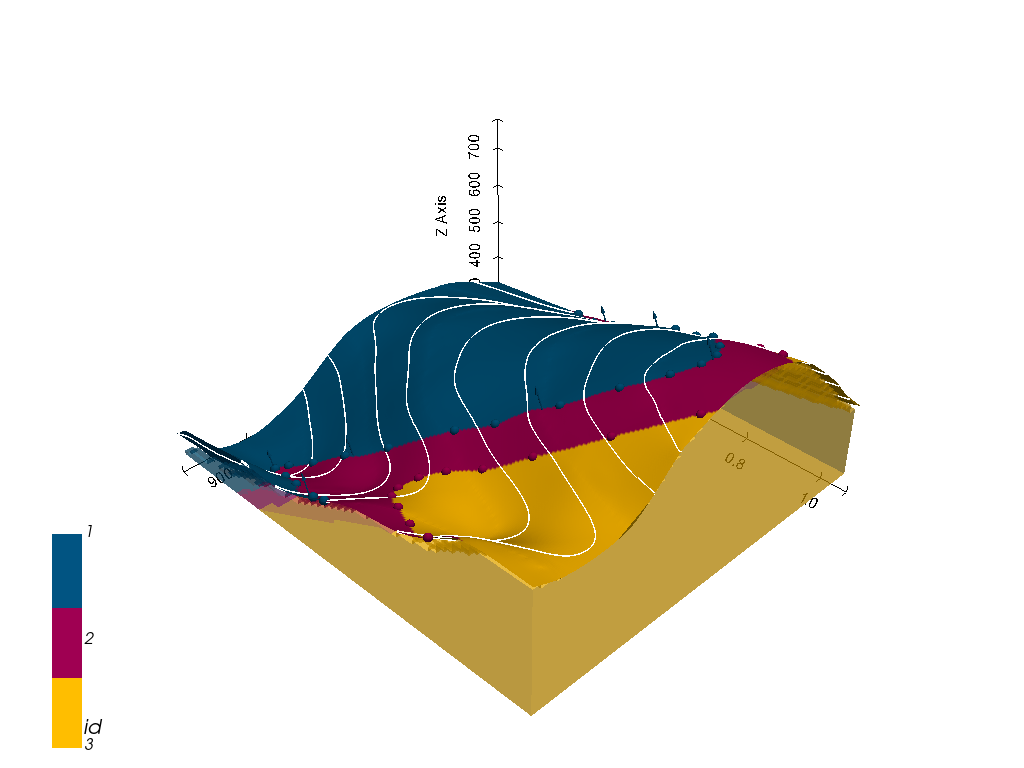

In [105]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True)

<a id='post'></a>
# Postprocessing - Converting Geological Map to Shape Files and GeoTiffs

## Create GeoDataFrame with Polygons

In [106]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

formation                                           geometry
0  basement  POLYGON ((4.279 499.515, 5.832 500.809, 8.752 ...
1  basement  POLYGON ((810.648 569.124, 814.536 567.912, 81...
2      Sand  POLYGON ((837.864 165.009, 841.752 164.734, 84...
3       Ton  POLYGON ((5.832 1.944, 9.720 1.944, 13.608 1.9...

## Plot Polygons

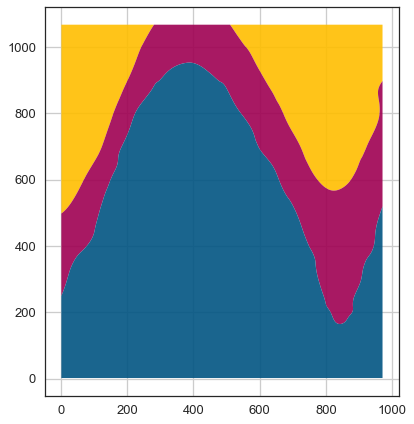

In [107]:
cols = geo_model.surfaces.df.color.to_list()
cols = [cols[1], cols[0], cols[2]]
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [108]:
gdf.to_file('../../gemgis/data/Test1/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [50]:
gg.raster.save_as_tiff('../../../gemgis/data/Test1/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Reporting your Python environment's package versions and hardware resources

In [109]:
import scooby

In [110]:
scooby.Report(additional=[gpd, rasterio, gg])

--------------------------------------------------------------------------------
  Date: Sat Jul 25 21:31:50 2020 W. Europe Daylight Time

                OS : Windows
            CPU(s) : 24
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]

         geopandas : 0.6.1
          rasterio : 1.0.21
            gemgis : 0.0.x
             numpy : 1.18.5
             scipy : 1.5.0
           IPython : 7.16.1
        matplotlib : 3.2.2
            scooby : 0.5.2

  Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------